In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# store map size (pixels)
STORE_SIZE = [3136, 2475] 

TRANSFORMED_DATA_PATH = "results/trajectories/transformed_coords_1.04.csv"
TRANSFORMED_DATA_SELECT_CAMS_PATH = "C:/Users/diogo/Desktop/Tese/Resultados/transformed_coords_selected_cameras.csv"
MAP_PATH = "C:/Users/diogo/Desktop/Tese/Dados/floorplan.png"
COLOR_PER_CAMERA = {"1.03": "Greys", "1.04": "Greens", "1.05": "Oranges", "2.05": "Blues", "2.11": "RdPu"}

In [8]:
df = pd.read_csv(TRANSFORMED_DATA_PATH)
df.head()

,Unnamed: 0.1,Unnamed: 0,video_name,frame_id,xmin,ymin,xmax,ymax,velocity,customer_id,x_floorplan,y_floorplan,camera,x_floorplan_new,y_floorplan_new,time
0,0,0,20220314_1.04_1_0_blurred,398,664.959750,32.512807,689.239517,101.778712,0.000,2,-353.852228,-40.627627,1.04,1442.936646,1692.551946,07:49:07
1,1,1,20220314_1.04_1_0_blurred,402,717.653646,37.581394,759.203605,140.072646,0.000,3,-354.396799,-43.024773,1.04,1424.089429,1632.391460,07:49:08
2,2,2,20220314_1.04_1_0_blurred,403,721.590021,38.775865,762.533995,140.328552,0.422,3,-354.357031,-43.038787,1.04,1425.465757,1632.039748,07:49:08
3,3,3,20220314_1.04_1_0_blurred,404,734.751993,41.812894,776.444208,145.165120,1.532,3,-354.343352,-43.140340,1.04,1425.939169,1629.491125,07:49:08
4,4,4,20220314_1.04_1_0_blurred,405,744.055281,43.233574,786.895511,148.351335,1.706,3,-354.302983,-43.244307,1.04,1427.336335,1626.881883,07:49:09


In [9]:
def get_data_by_customer(df, customer_id):
    return df.loc[df["customer_id"] == customer_id]

def get_data_by_customer_and_camera(df, customer_id, camera):
    return df.loc[df["customer_id"] == customer_id].loc[df["camera"] == camera]

def get_data_by_time(df, begin_time, end_time):
    return df.loc[(df["time"] > begin_time) & (df["time"] < end_time)]

def count_different_customers(df):
    return df.customer_id.unique().size

def get_time_interval(df):
    min_time = df["time"].min()
    max_time = df["time"].max()
    return (min_time, max_time)

def get_color(camera, i, length):
    palette = sns.color_palette(COLOR_PER_CAMERA[camera], 3)
    if i < (length / 3):
        return palette[0]
    elif i < ((2*length) / 3):
        return palette[1]
    else:
        return palette[2]

def print_trajectory_chronologically(df):
    img = plt.imread(MAP_PATH)
    fig, ax = plt.subplots()
    fig.set_dpi(1200)
    ax.imshow(img, extent=[0, STORE_SIZE[0], 0, STORE_SIZE[1]])

    pd.to_datetime(df["time"], format="%H:%M:%S")
    df_chrono = df.sort_values(["time"])

    for camera in df_chrono["camera"].unique():
        camera_list = df_chrono.loc[df_chrono.camera == camera].values.tolist()
        for i in range(len(camera_list)):
            proj_color = get_color(str(camera), i, len(camera_list))
            print("bbox coords: (" + str(camera_list[i][4]) + " " + str(camera_list[i][5]) + " " + str(camera_list[i][6]) + " " + 
                  str(camera_list[i][7]) + ") camera: " + str(camera_list[i][12]))
            plt.scatter(camera_list[i][13], camera_list[i][14], marker=".", s=1, lw=0, color=proj_color)
        
    plt.show()


def print_coordinate(x_coord, y_coord):
    img = plt.imread(MAP_PATH)
    fig, ax = plt.subplots()
    fig.set_dpi(1200)
    ax.imshow(img, extent=[0, STORE_SIZE[0], 0, STORE_SIZE[1]])
    plt.scatter(x_coord, y_coord, marker=".", s=1, lw=0, color="red")
    plt.show()


def print_trajectory_by_client(df):
    img = plt.imread(MAP_PATH)
    fig, ax = plt.subplots()
    fig.set_dpi(1200)
    ax.imshow(img, extent=[0, STORE_SIZE[0], 0, STORE_SIZE[1]])

    counter = 0
    color_palette = sns.color_palette("Paired", len(df["customer_id"].unique()))
    for customer in df["customer_id"].unique():
        plt.scatter(df.loc[df.Customer_id == customer, "x_floorplan_new"], df.loc[df.Customer_id == customer, "y_floorplan_new"], marker=".", s=1, lw=0, color=color_palette[counter])
        counter+=1
        
    plt.show()

### Exemplo 1
Nos vídeos, no tempo determinado (15h24 às 15h26) não existe nenhum cliente na area das camaras 1.03, 1.04 e 1.05.
No entanto, existem projeções com esse tempo.
Desta forma conseguimos perceber desde logo que o tempo está errado.

4
bbox coords: (928.53517357702 61.922089385986325 959.378742438605 139.3618766784668) camera: 1.04
bbox coords: (922.7169816361956 61.03185675647821 954.3884715338692 139.898954304325) camera: 1.04
bbox coords: (916.5474011584504 59.41379441563424 948.7039085847204 139.00015982446553) camera: 1.04
bbox coords: (911.6436333335712 55.36658042684056 943.9636089436756 135.7547652847644) camera: 1.04
bbox coords: (897.1941299990747 51.70236686358732 929.1532998859084 131.24475259526233) camera: 1.04
bbox coords: (890.8256164461021 48.14483368227482 923.2323281981508 129.26986404269033) camera: 1.04
bbox coords: (887.2828188039797 45.1764275135243 917.9086257642036 123.18323942804064) camera: 1.04
bbox coords: (256.1891709497454 488.7566284179687 447.2459608861921 719.8089477539063) camera: 1.04
bbox coords: (241.04905643348 470.5357196231429 446.5513524751767 719.6410619610084) camera: 1.04
bbox coords: (223.03075183272256 448.4296156019731 438.30983792655127 710.0577943941485) camera: 1.0

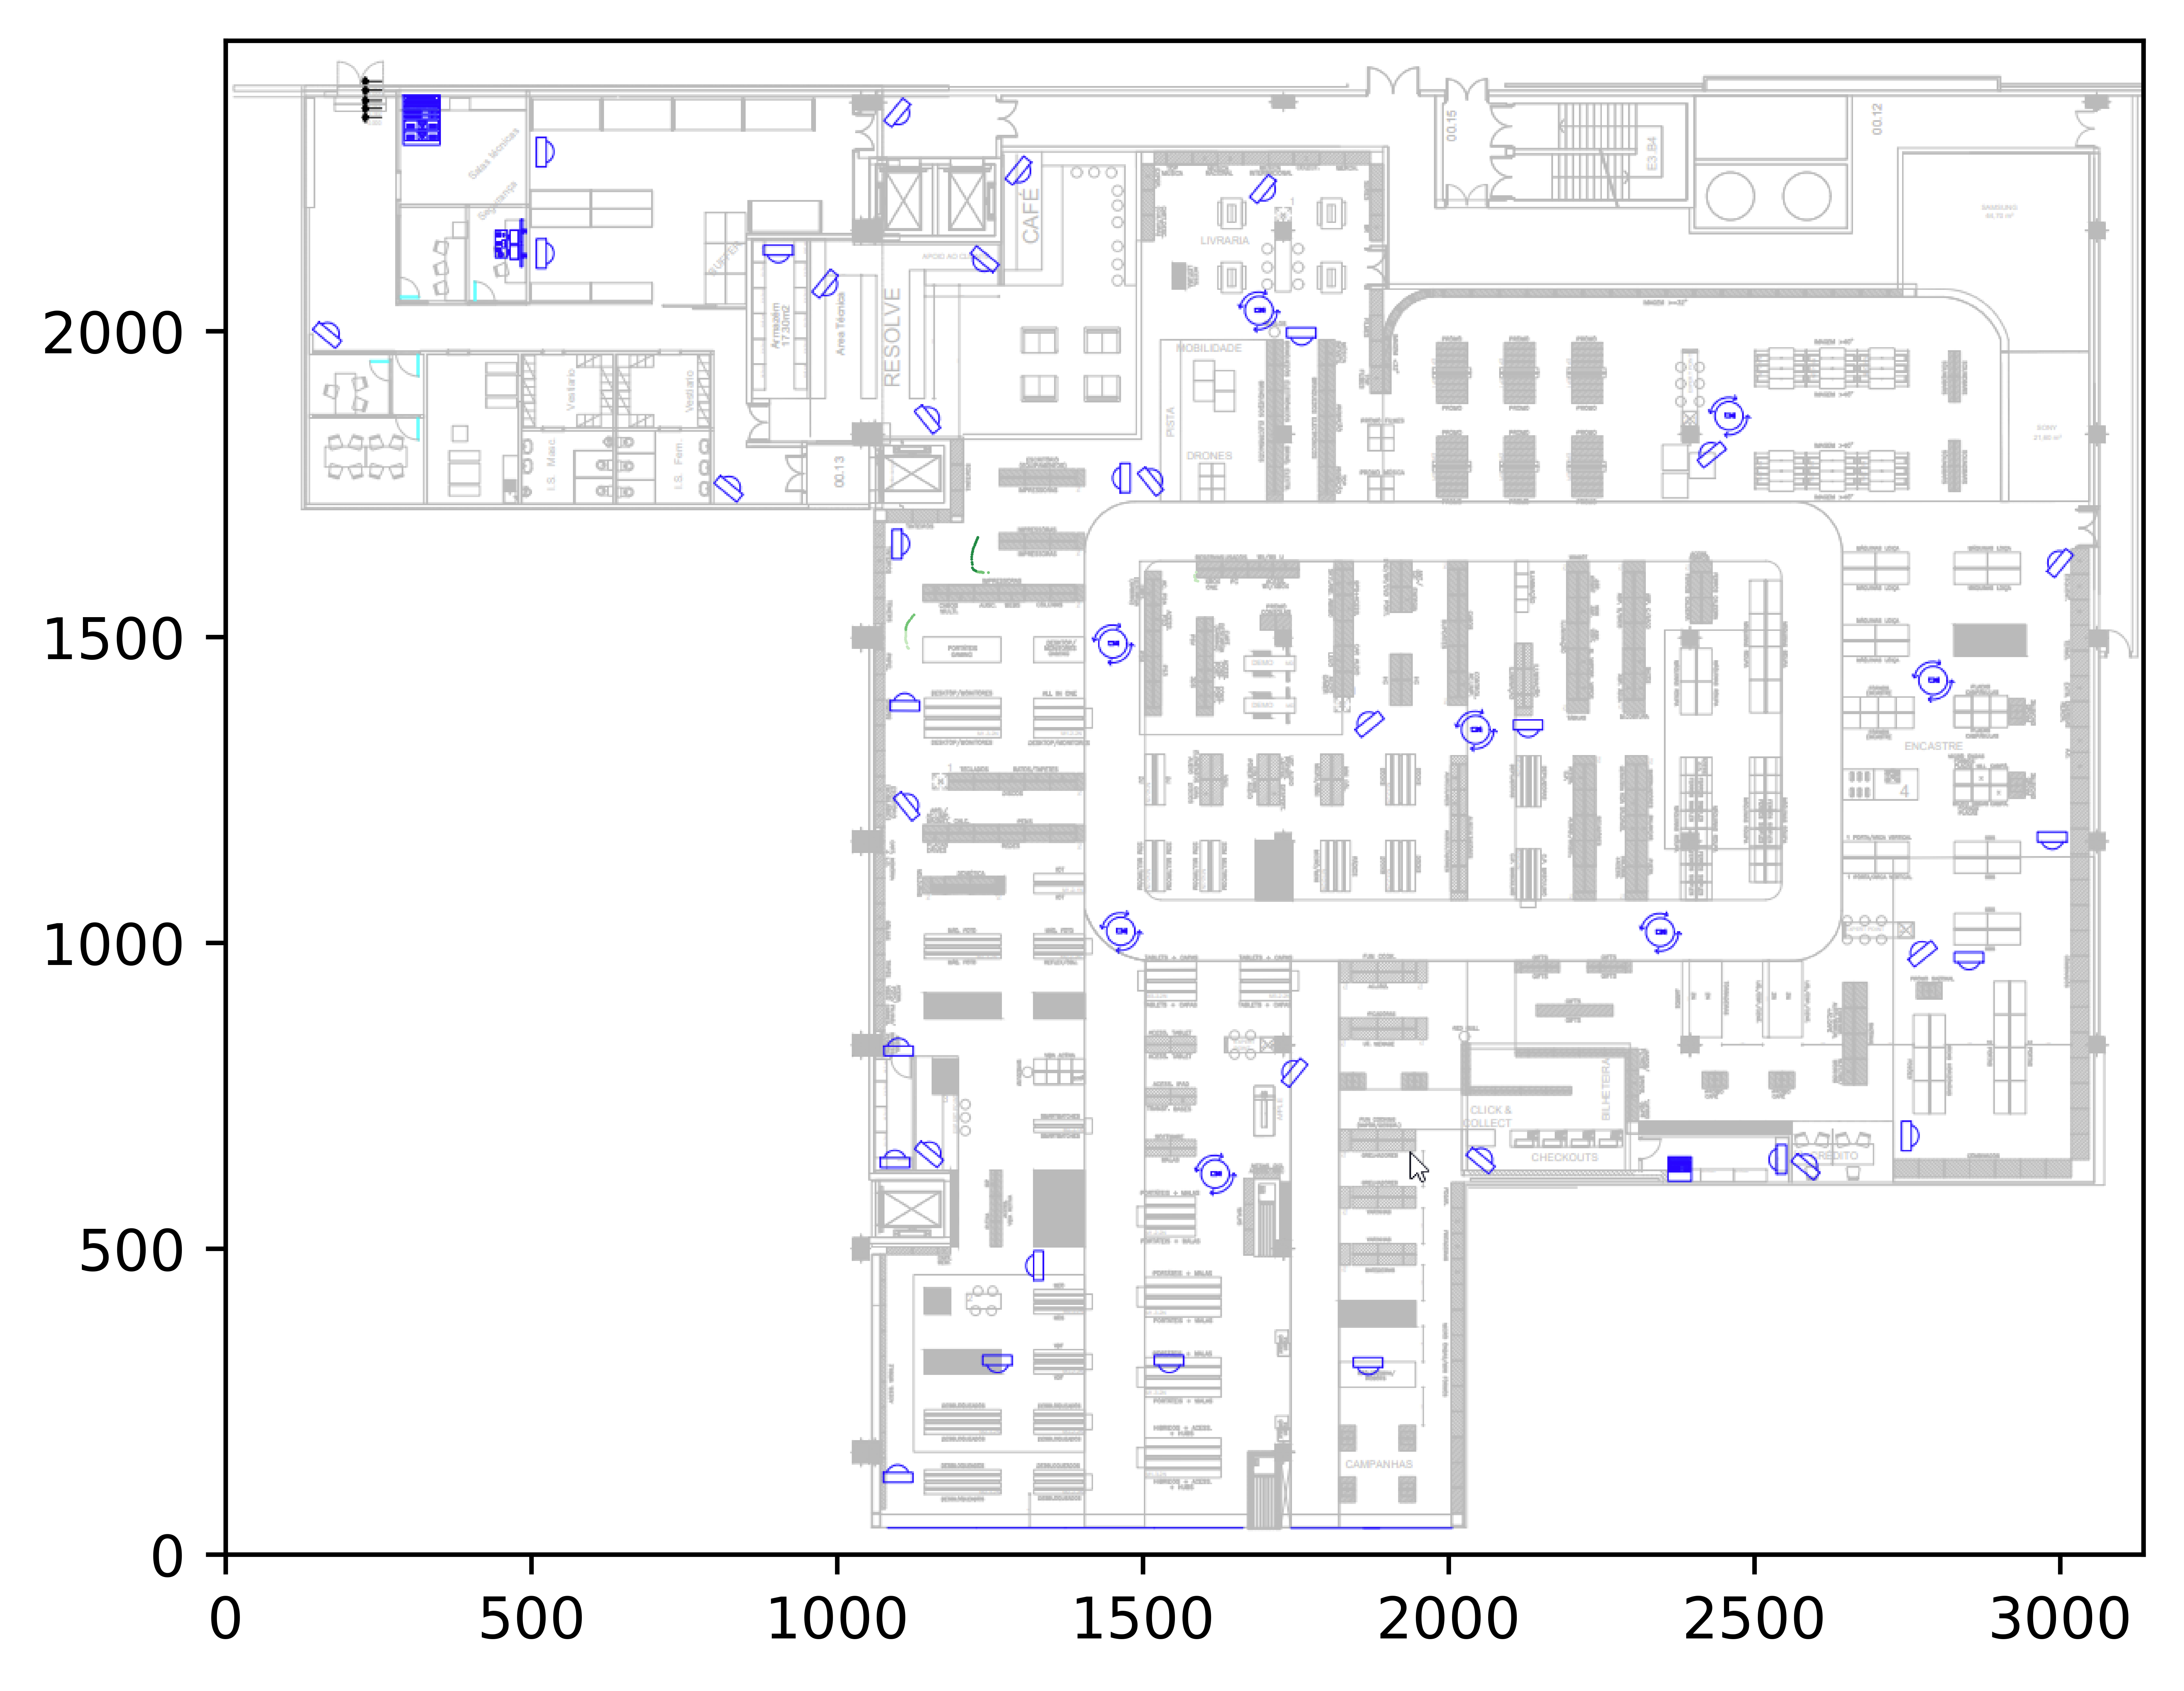

In [19]:
data_by_time = get_data_by_time(df, "15:00:45", "15:01:08")
#data_by_customer = get_data_by_customer(df, 1)
print(count_different_customers(data_by_time))
print_trajectory_chronologically(data_by_time)

### Exemplo 2

Para ver quando acaba a gravação da camara

Mais escuro -> mais recente<br>
Mais esboçado  -> mais antigo

106
bbox coords: (402.2563523778822 49.84243469238281 439.6519117822741 138.97752990722654) camera: 1.04
bbox coords: (656.9335704348189 37.44784240722656 681.601390502681 102.59438171386718) camera: 1.04
bbox coords: (663.0114953344537 35.86656632430691 687.9357833620858 101.55057429974327) camera: 1.04
bbox coords: (702.4945311612048 41.87410888671874 733.8565186434829 95.18841552734376) camera: 1.04
bbox coords: (705.0695053073056 42.182603379755925 736.5260074178057 95.63266908205809) camera: 1.04
bbox coords: (706.6093653014627 42.59750824819756 738.3235143958057 96.52773691864532) camera: 1.04
bbox coords: (705.6948951392692 42.23215463006807 741.309792083609 103.10929641933932) camera: 1.04
bbox coords: (705.3257576760026 42.89195042816603 743.2972415570574 108.37924992913264) camera: 1.04
bbox coords: (705.2371559690614 43.453210876003226 743.359855798329 109.85638628958216) camera: 1.04
bbox coords: (706.4766707694566 44.27976333348178 744.0627664494291 110.34209988613182) cam

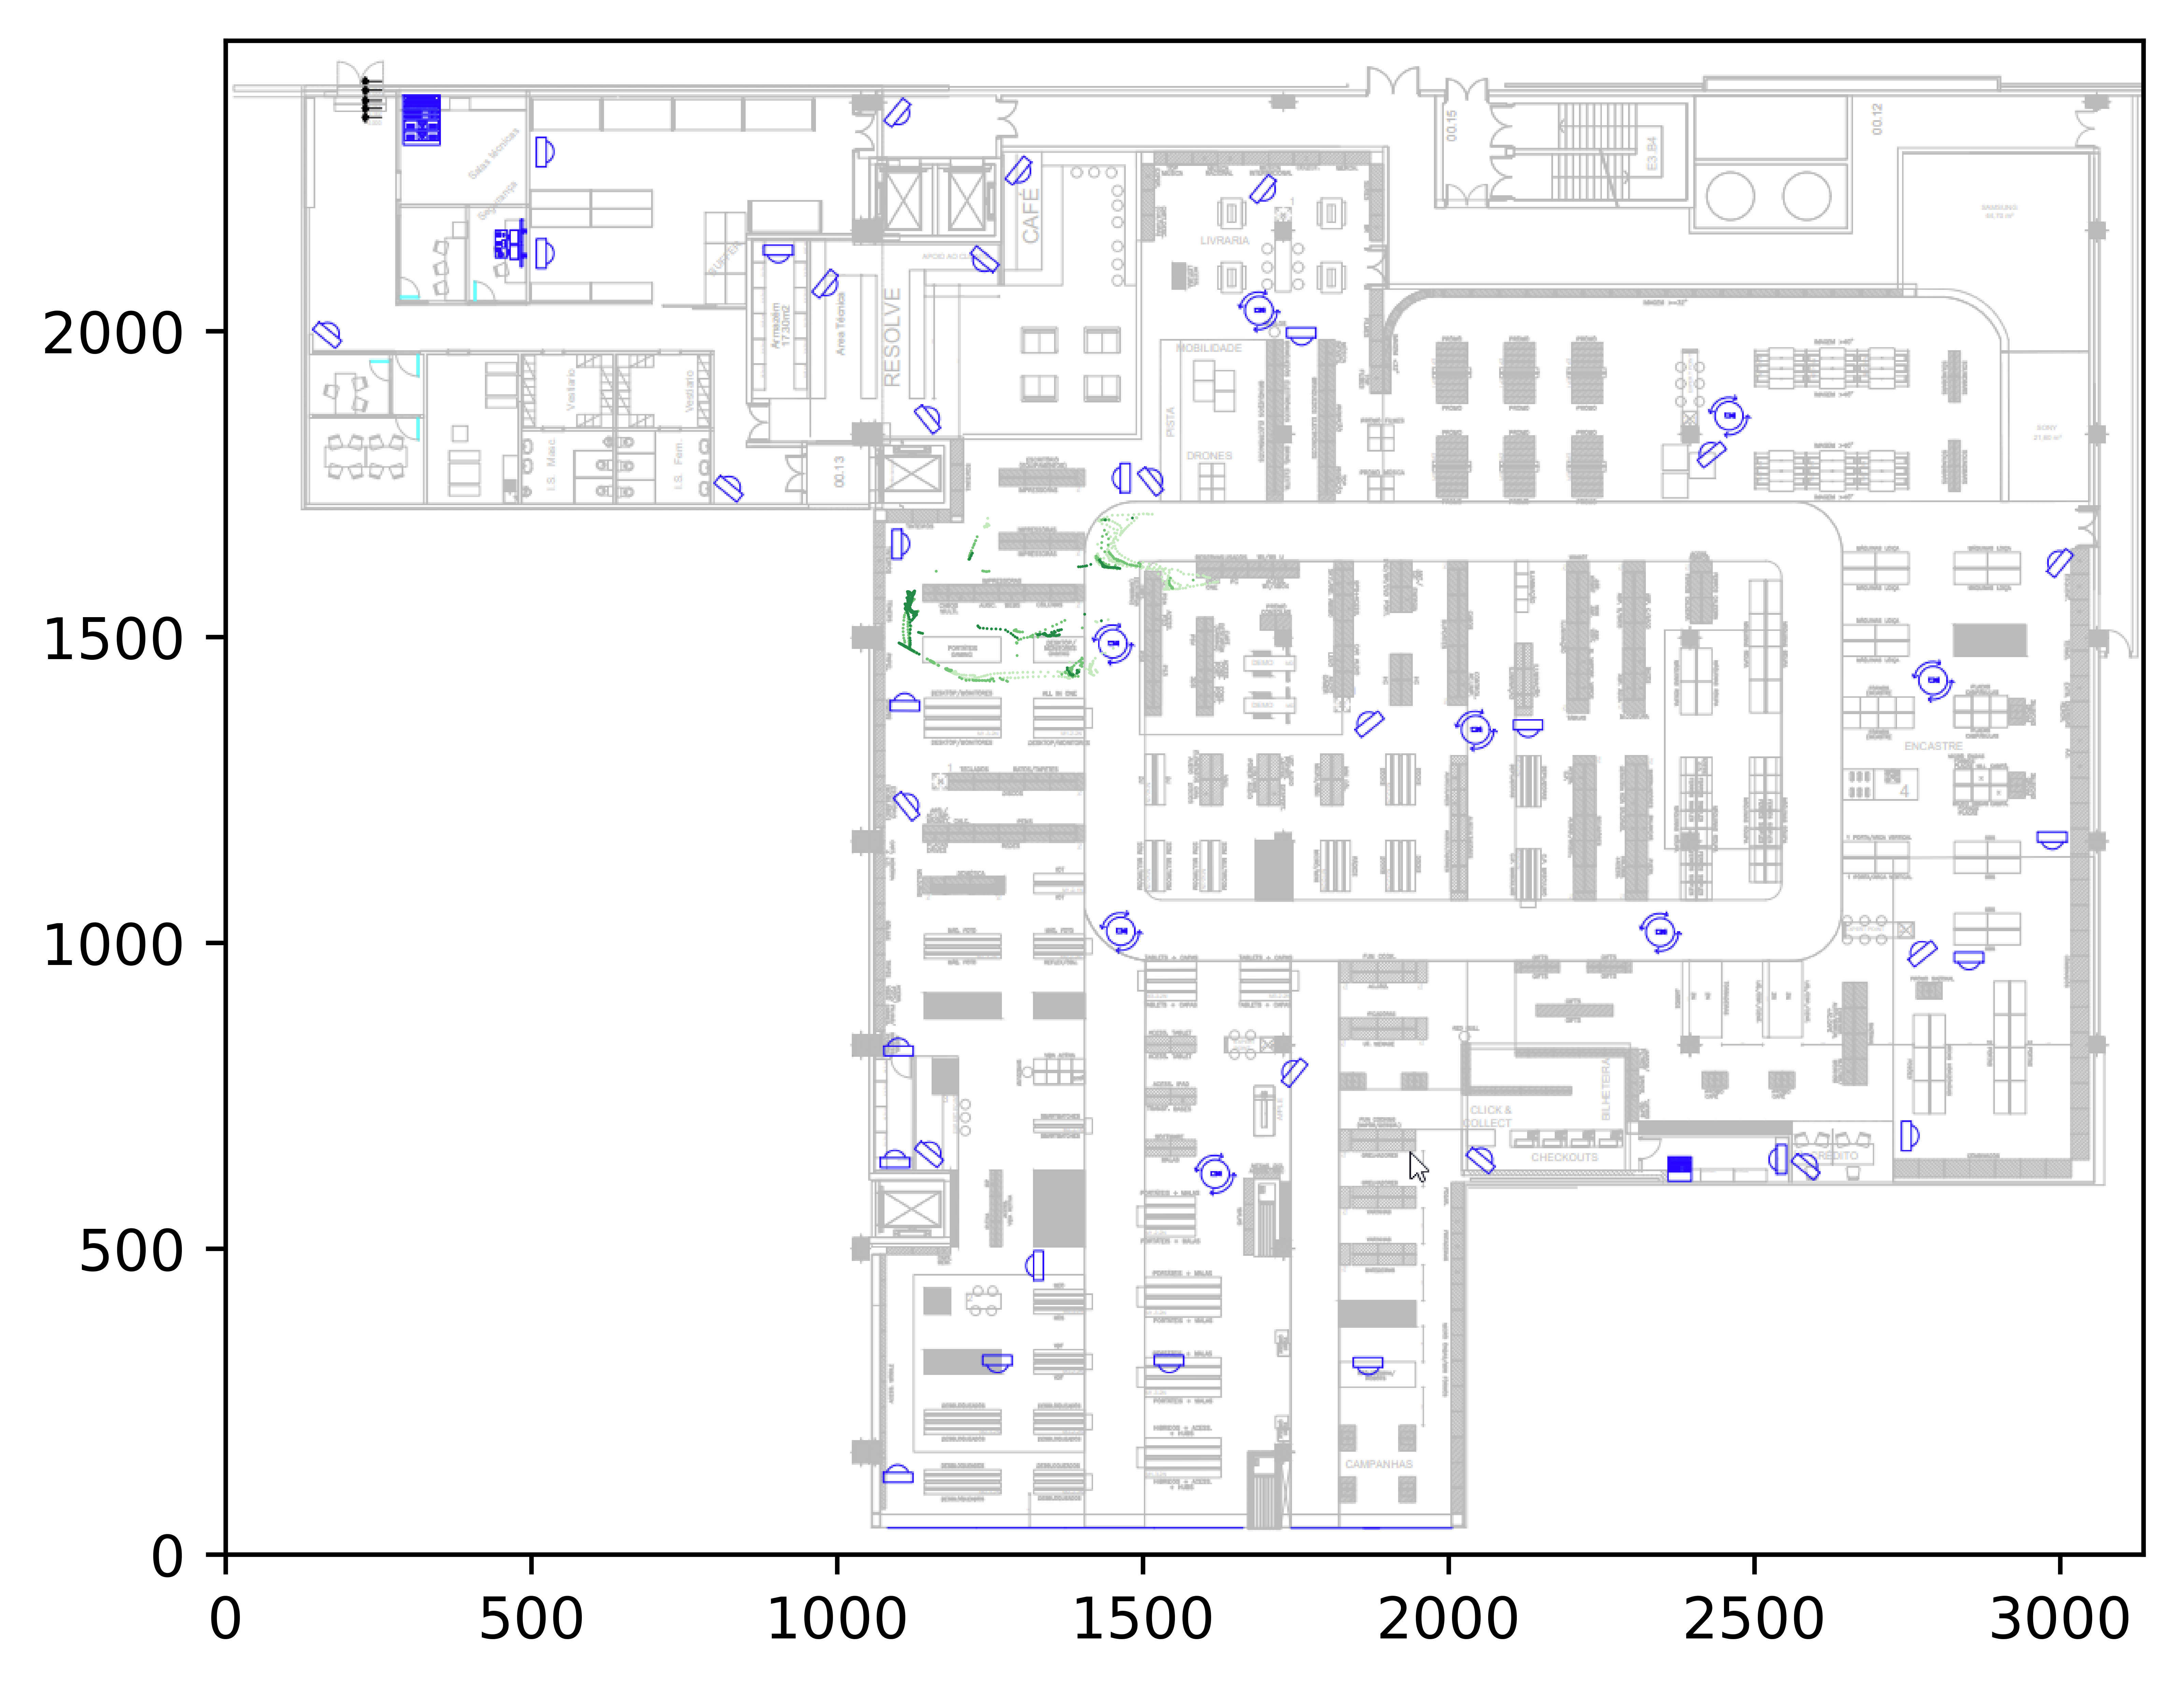

In [11]:
data_by_time = get_data_by_time(df, "23:00:00", "23:30:00")
print(count_different_customers(data_by_time))
print_trajectory_chronologically(data_by_time)

### Exemplo 3

09:30:14 é a hora que aparece o primeiro ponto da trajetória da camara 1.03

mesmo assim, não corresponde ao momento do vídeo em que aparece a primeira pessoa porque a trajetória vai de cima para baixo.

1
bbox coords: (1128.3501608436536 211.9263366699219 1194.7644387657217 344.62015991210944) camera: 1.04
bbox coords: (1105.6286474086817 206.86814418635004 1173.923205183469 343.0162107968363) camera: 1.04
bbox coords: (1099.0596394415347 249.43759869668867 1140.0810980923568 329.48805258631904) camera: 1.04


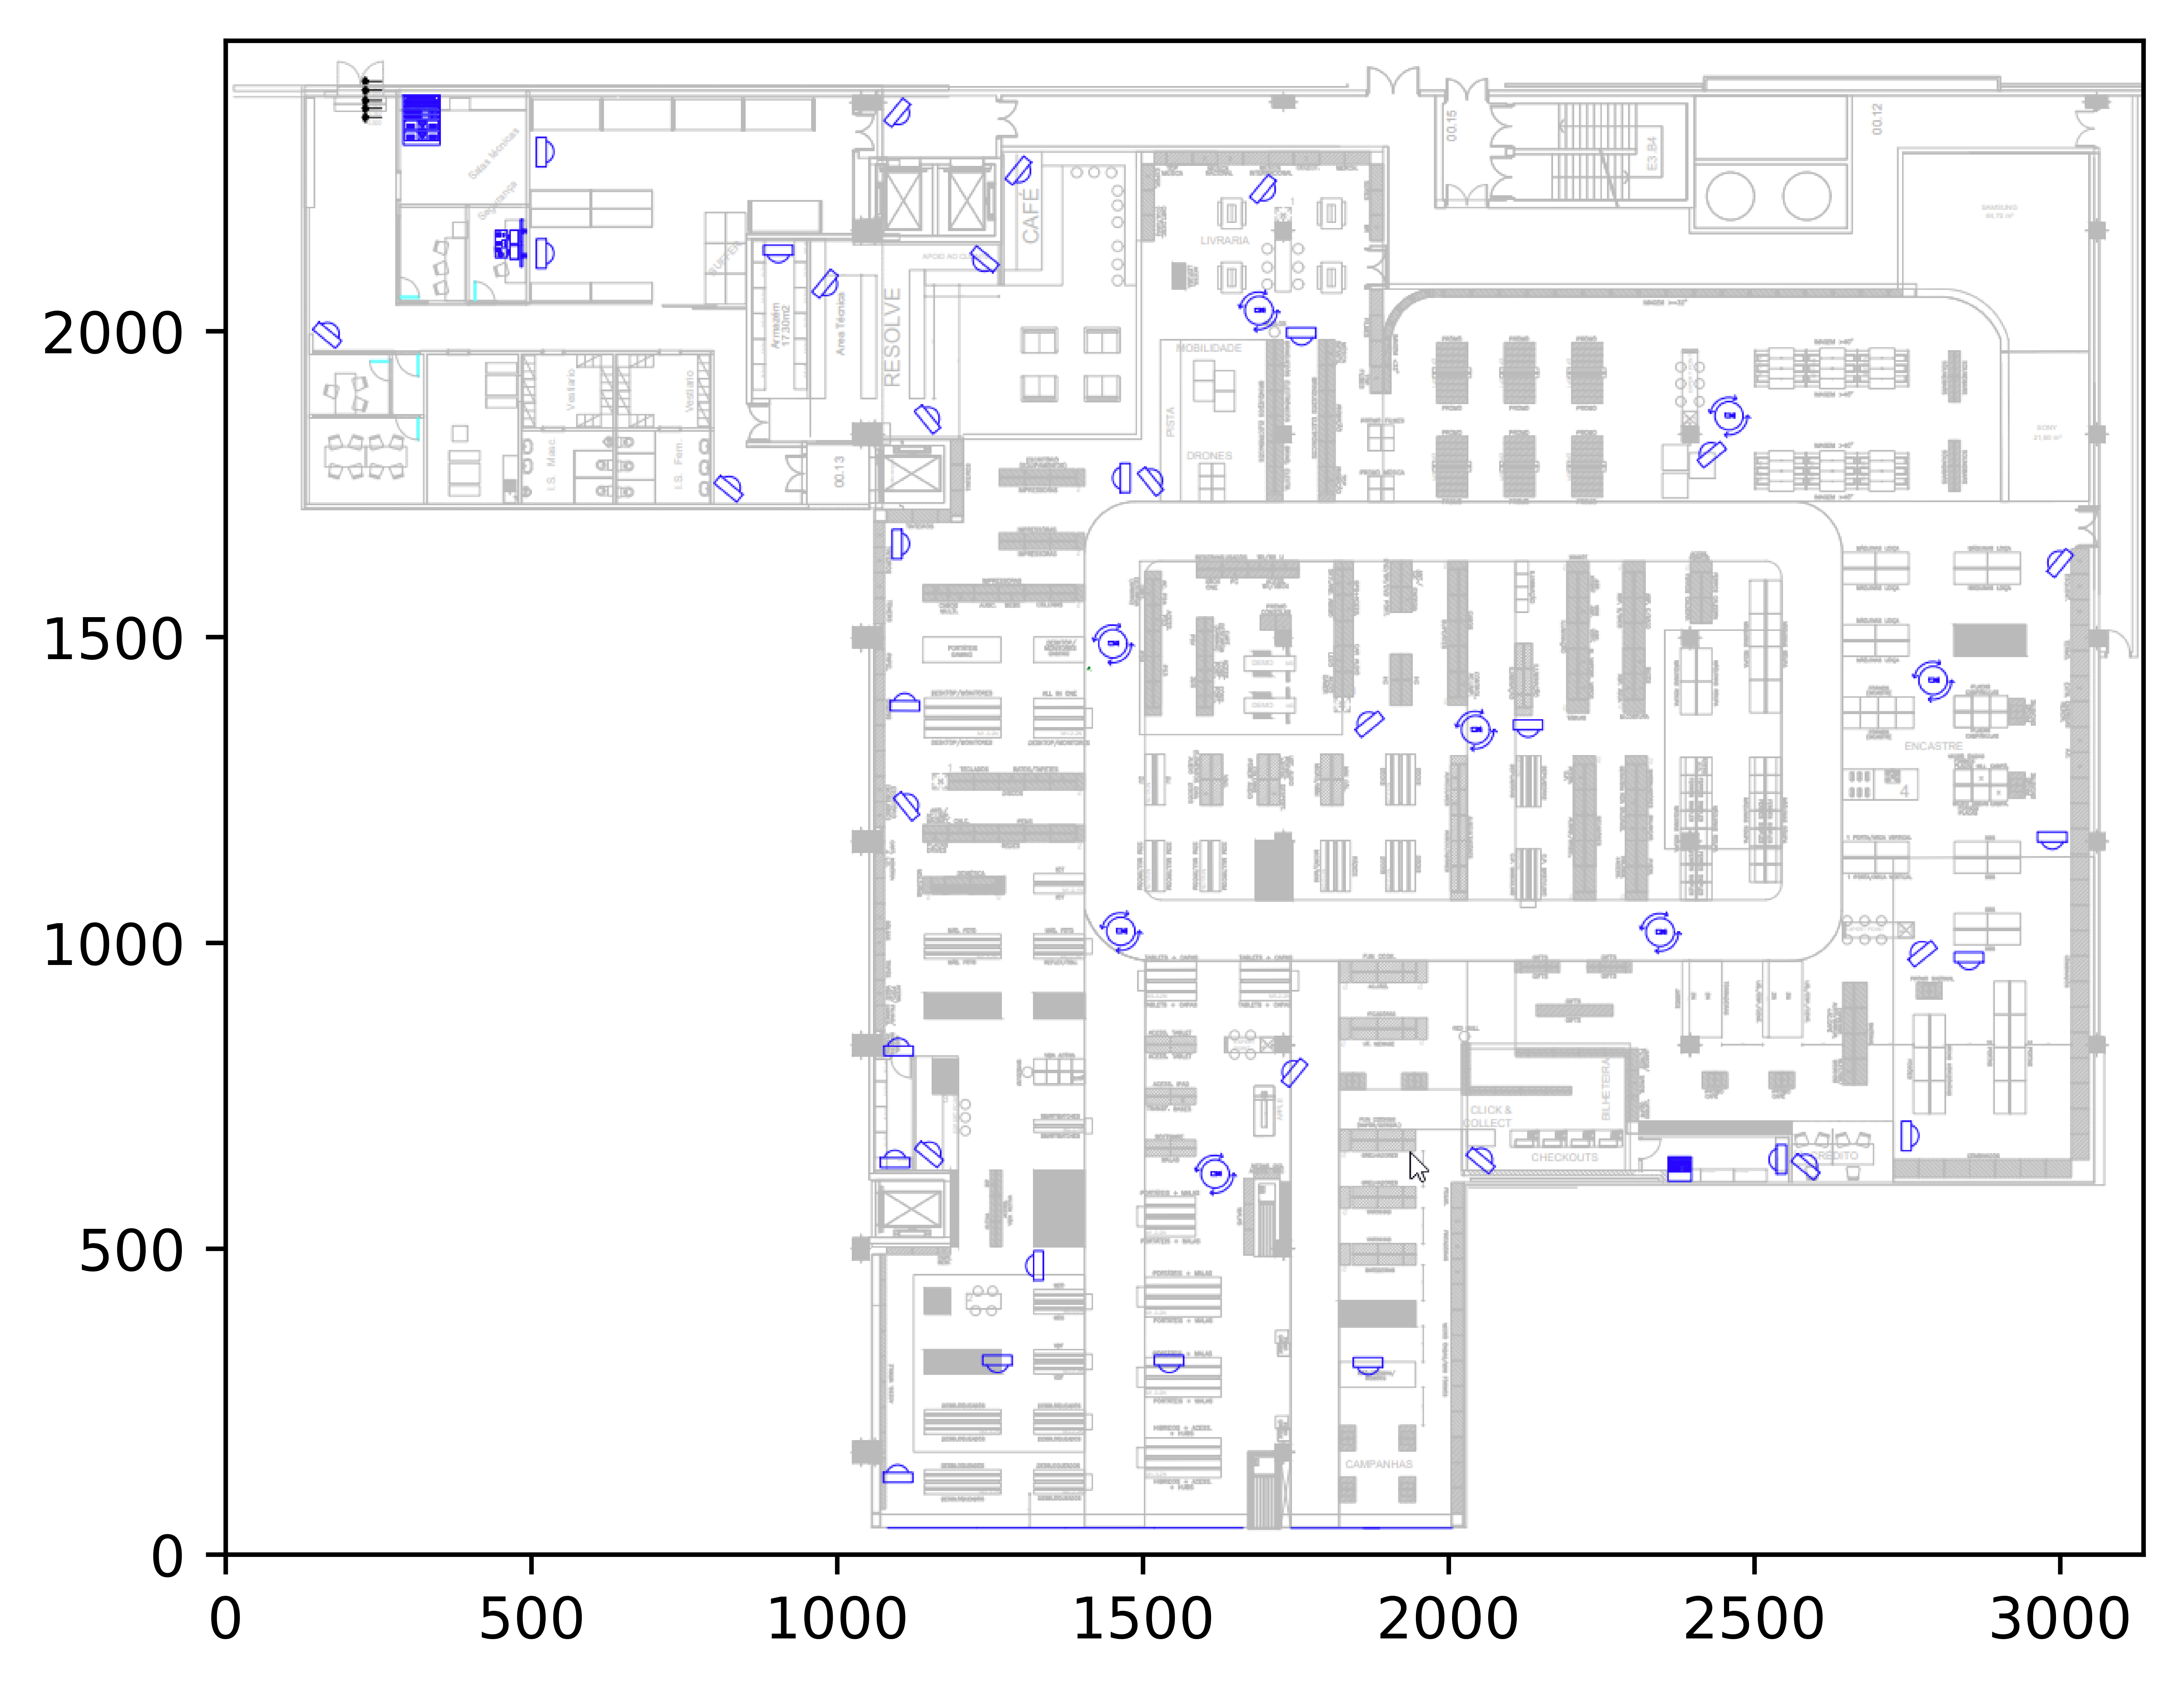

In [12]:
data_by_time = get_data_by_time(df, "09:30:00", "09:30:20")
print(count_different_customers(data_by_time))
print_trajectory_chronologically(data_by_time)

### Exemplo 4

os pontos de trajetória com início às 08:31:25 parecem corresponder à hora do vídeo 08:42:51 (isto para a câmara 1.04)

15
bbox coords: (269.7599954522793 216.0135140967165 322.3504905737248 361.8122440949133) camera: 1.04
bbox coords: (269.6887964590162 216.04918823242187 322.2674779550462 361.8287170410156) camera: 1.04
bbox coords: (269.77681231053907 215.9828441736135 322.3846618495876 361.804143777721) camera: 1.04
bbox coords: (269.63231336172214 216.03770061178244 322.2684464162236 361.8291648754711) camera: 1.04
bbox coords: (269.7474346560271 216.0798747829417 322.3294973402083 361.78858053888905) camera: 1.04
bbox coords: (269.70896976734934 216.0855650242013 322.29835832338745 361.7810801105096) camera: 1.04
bbox coords: (269.6844098200873 216.08836270112943 322.2851107998303 361.7830725475518) camera: 1.04
bbox coords: (269.74841358235585 216.0752404369001 322.4093239612196 361.8846934984082) camera: 1.04
bbox coords: (269.70844063625253 216.1007906057352 322.37621476525453 361.8662929024992) camera: 1.04
bbox coords: (269.69205673632973 216.1132172385486 322.3702775737263 361.8513195635329)

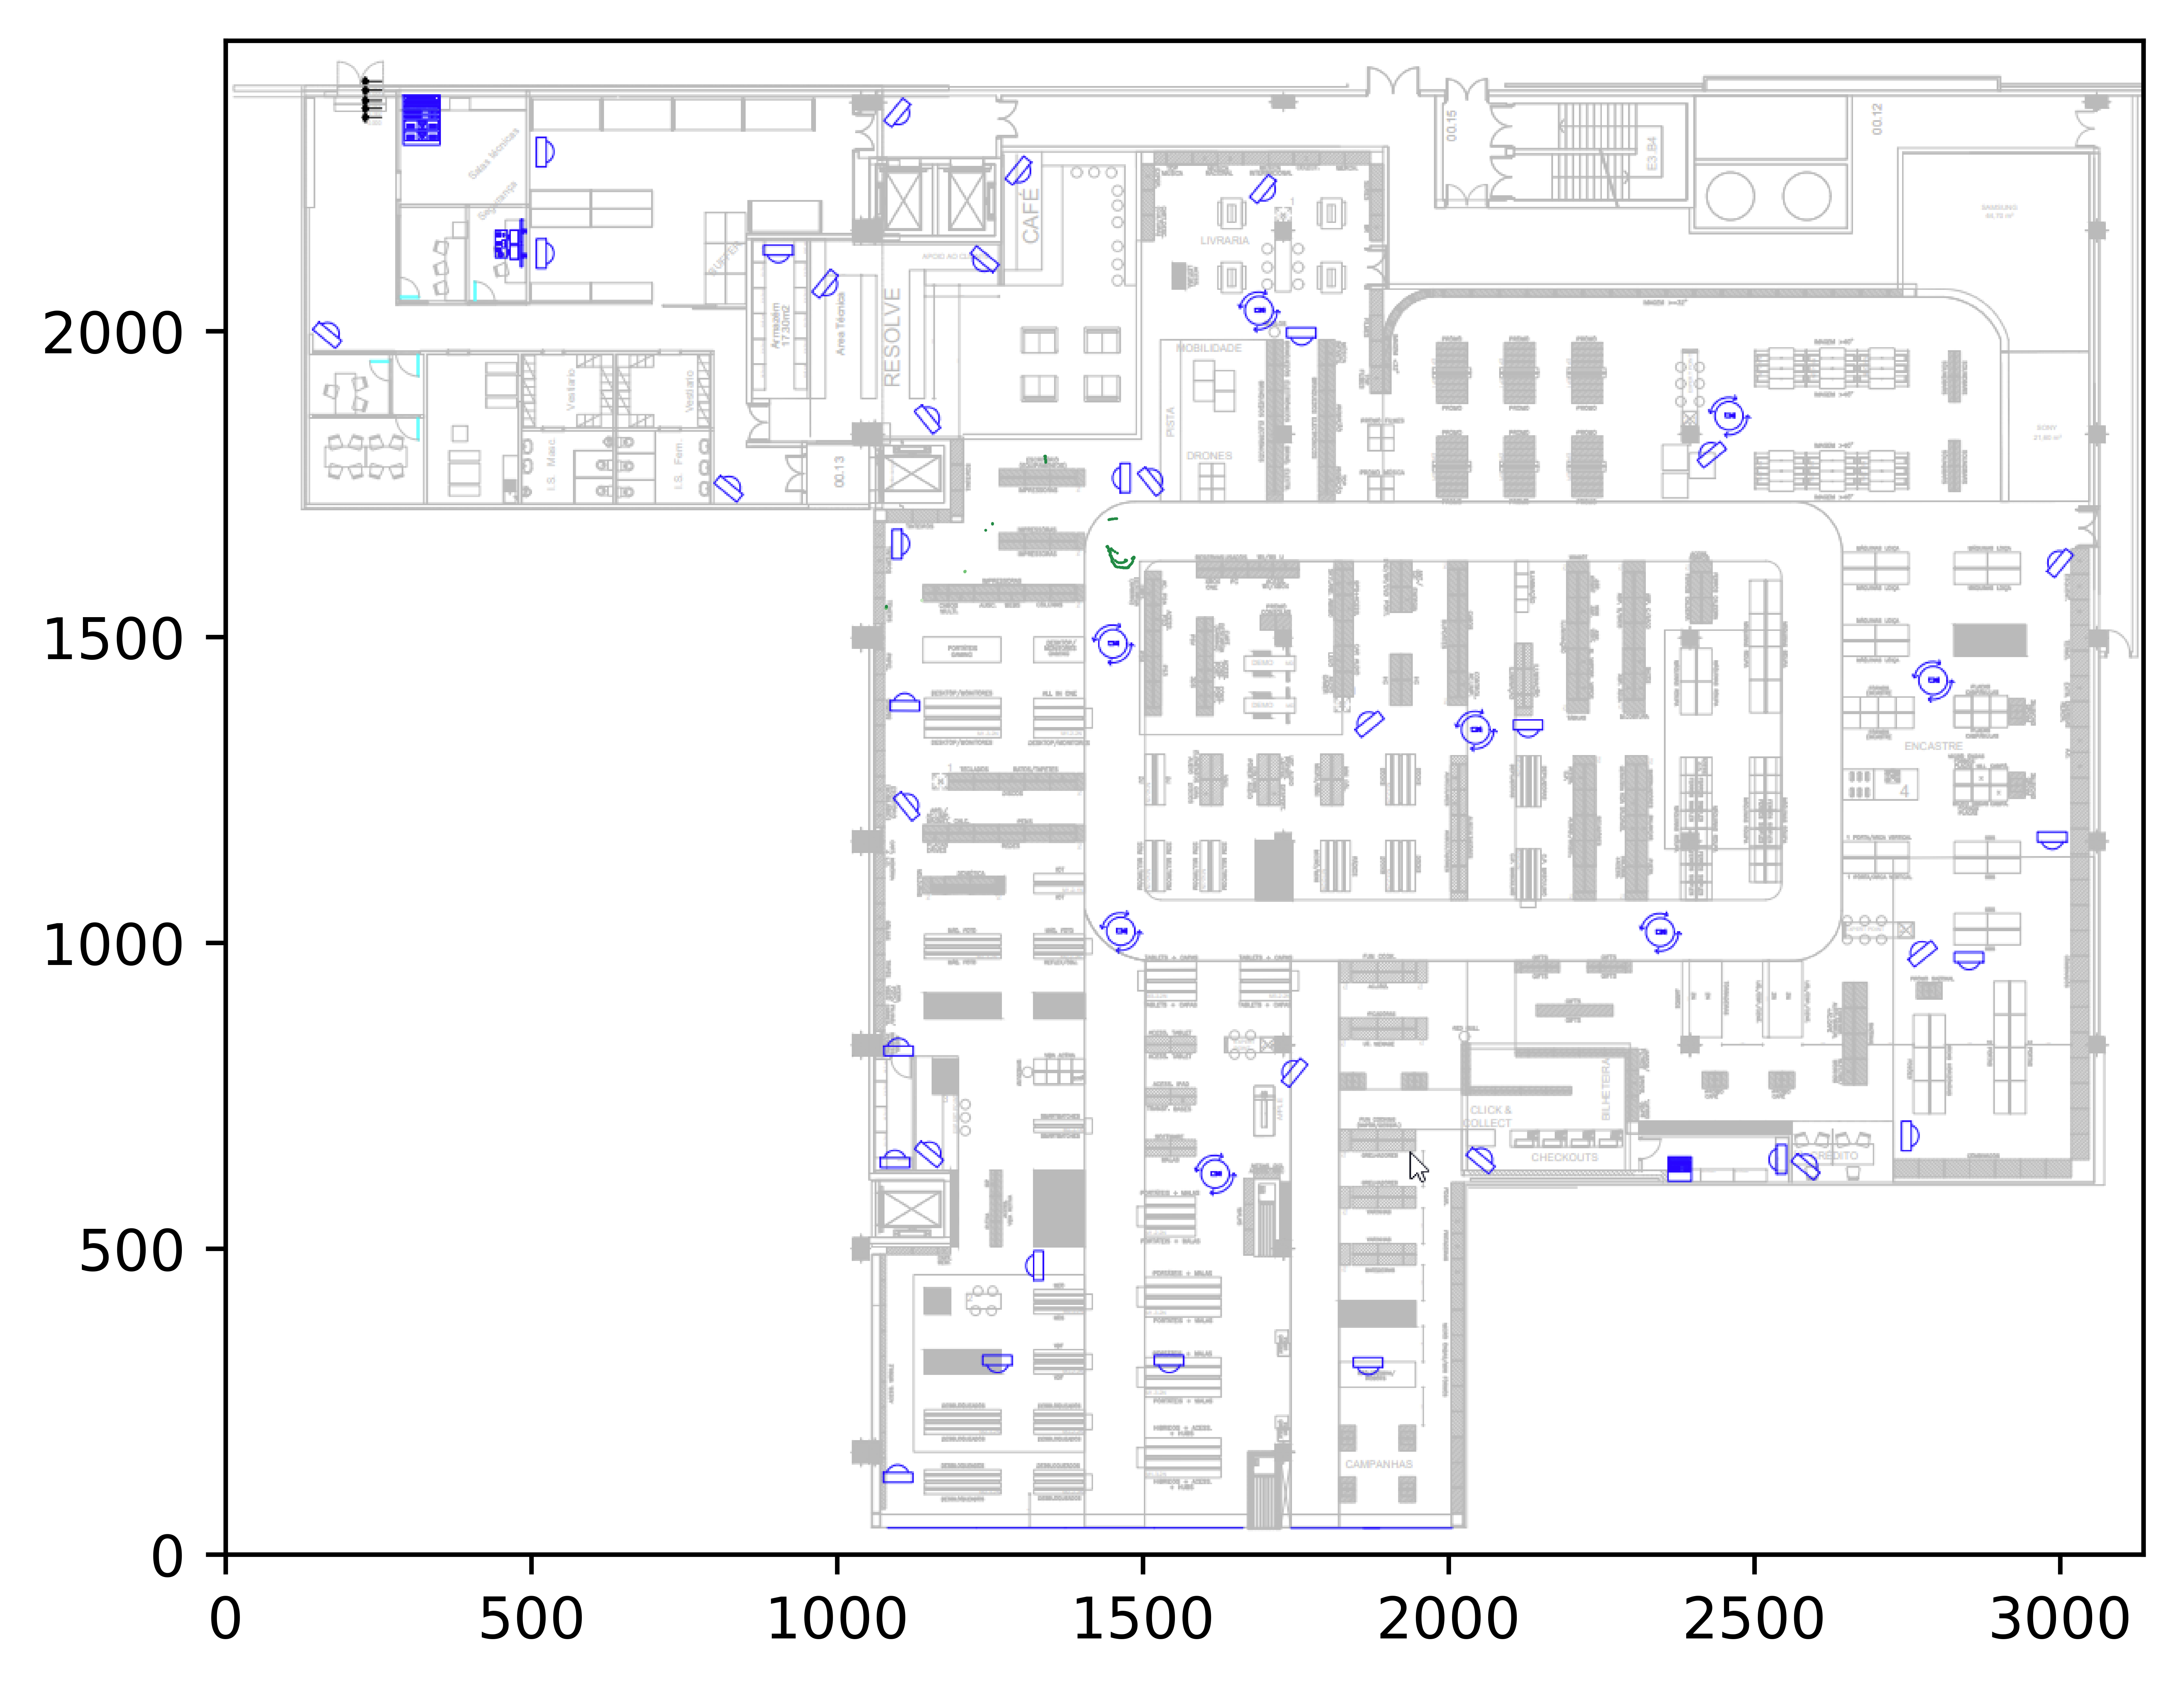

In [13]:
data_by_time = get_data_by_time(df, "08:00:00", "08:30:00")
print(count_different_customers(data_by_time))
print_trajectory_chronologically(data_by_time)